### Link: https://www.youtube.com/watch?v=u_N1t0CBuqA&t=634s

In [ ]:
# %pip install --upgrade chromadb
# %pip install pillow
# %pip install open-clip-torch
# %pip install tqdm
# %pip install matplotlib


In [60]:
import chromadb 
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction 
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt 

In [61]:
chroma_client = chromadb.PersistentClient(path='chrom_vectordb')

image_loader = ImageLoader()
multimodal_ef = OpenCLIPEmbeddingFunction()
multmodal_db = chroma_client.get_or_create_collection(name="multimoda_db", embedding_function=multimodal_ef, data_loader=image_loader)

In [67]:
multmodal_db.update(                                                # add: to add first time, update: to update
    ids = ['0', '1'],
    uris=['images/lion.jpg', 'images/tiger.jpg'],
    metadatas=[
        {'item_id':'0', 'img_category':'animals', 'item_name':'lion'}, 
        {'item_id':'1', 'img_category':'animals', 'item_name':'tiger'}]
)

In [63]:
multmodal_db.add(
    ids = ['E23', 'E25', 'E33'],
    uris=[
        'images/E23-2.jpg',
        'images/E25-2.jpg',
        'images/E33-2.jpg'
    ],
    metadatas=[
        {'item_id':'E23', 'img_category':'food', 'item_name':'Braised fried tofu with greens'},
        {'item_id':'E25', 'img_category':'food', 'item_name':'Sauteed assorted vegetables'},
        {'item_id':'E33', 'img_category':'food', 'item_name':'Kung pao tofu'}
    ]
)

In [64]:
multmodal_db.count()

5

In [65]:
def print_query_results(query_list: list, query_results: dict)->None:
    result_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')

        for j in range(result_count):
            id       = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data     = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri      = query_results['uris'][i][j]

            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}') 

            # Display image, the physical file must exist at URI.
            # (ImageLoader loads the image from file)
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

Results for query: tiger
id: 1, distance: 1.3720354214095736, metadata: {'img_category': 'animals', 'item_id': '1', 'item_name': 'tiger'}, document: None
data: images/tiger.jpg


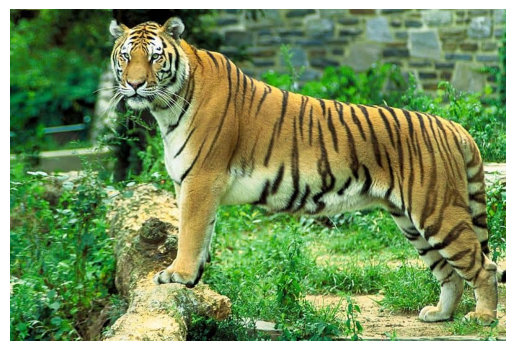

id: 0, distance: 1.5938994730874978, metadata: {'img_category': 'animals', 'item_id': '0', 'item_name': 'lion'}, document: None
data: images/lion.jpg


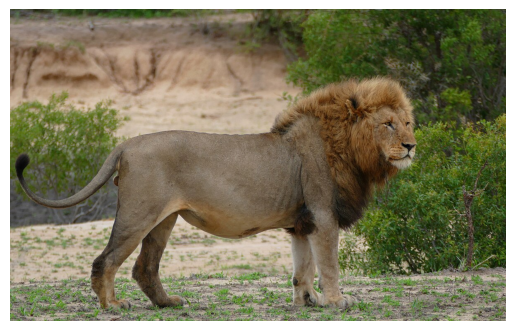

In [78]:
query_texts=['tiger']

query_results = multmodal_db.query(
    query_texts = query_texts,
    n_results = 5, 
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':{'$ne':'food'}}
)
print_query_results(query_texts, query_results)
# print(query_results)